La sección es Compacta
P_no 3163053.5999999996
C_3c 0.8388
La rigidez efectiva es: 28211487475085.46
La inercia efectiva es: 141057437.3754273 mm^4
La masa d la columna es: 153.9426 kg/m
P_e 15058816.82838887
La carga critica es: 2896846.7088313634
La constante torsional de la columna es: 33764062500.0 mm^4
         Beam                                      L/C  Node   Fx kN   Fy kN  \
0      1175.0       10 COMB - 1.2 DEAD + 0.5 ROOF LIVE   620  44.520 -13.683   
1         NaN                                      NaN     5 -30.957  13.683   
2         NaN                       11 COMB - 1.2 DEAD   620  42.635 -12.833   
3         NaN                                      NaN     5 -29.072  12.833   
4         NaN       12 COMB - 1.2 DEAD + 1.6 ROOF LIVE   620  48.667 -15.553   
...       ...                                      ...   ...     ...     ...   
25939     NaN                                      NaN   548   9.630   0.000   
25940     NaN  61 COMBINATION LOAD CASE (0.9D + 1.0

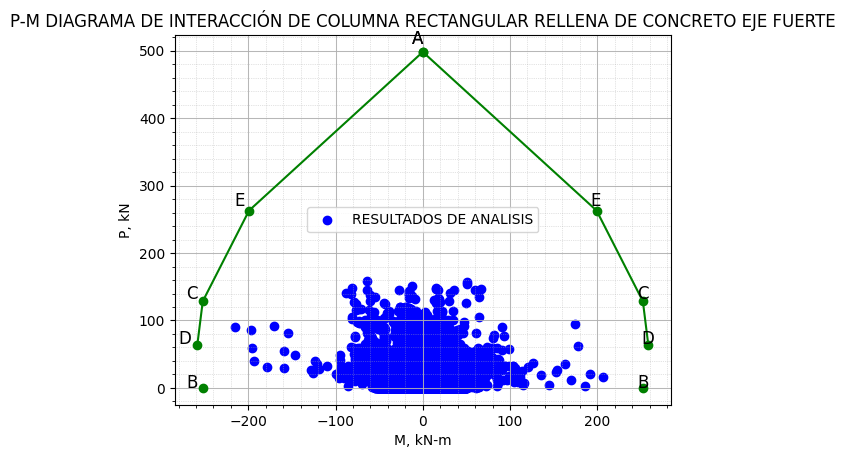

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25944 entries, 0 to 25943
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Beam     1055 non-null   float64
 1   L/C      12972 non-null  object 
 2   Node     25944 non-null  int64  
 3   Fx kN    25944 non-null  float64
 4   Fy kN    25944 non-null  float64
 5   Fz kN    25944 non-null  float64
 6   Mx kN-m  25944 non-null  float64
 7   My kN-m  25944 non-null  float64
 8   Mz kN-m  25944 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.8+ MB
el valor hi es: 336 mm
El valor bi es: 136 mm
el valor As es: 6804 mm
El valor Ac es: 45696 mm
El valor MA es: 0 kN_m
El valor PA es: 3163053.6 kN
El valor ME es: 221388830.19220573 kN_m
El valor PE es: 1669420.1999999997 kN
El valor MC es: 280344363.95 kN_m
El valor PC es: 815673.6 kN
El valor MD es: 287224590.606 kN_m
El valor PD es: 407836.79999999993 kN
El valor MB es: 280344363.95 kN_m
El valor PB es: 0 

In [1]:
# Librerias necesarias
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

########################################################################################
# CALCULO DE LA RESISTENCIA DE LA COLUMNA RECTANGULAR RELLENA DE CONCRETO EJE FUERTE M_z
########################################################################################
# DEFINICIÓN DE VARIABLES DATOS QUE SE DEBEN INGRESAR POR EL USUSRIO 
# SON LOS UNICOS DATOS QUE SE DEBEN INGRESAR
########################################################################################
Fu = 425           # MPa
fy = 345           # MPa
fc = 21            # MPa 
Øv = 0.65          # Factor de seguridad a cortante
Pu = 1051180       # Carga axial en estudio N
H = 350            # sección longitudinal de columna en mm
B = 150            # sección transversal de columna en mm
t = 7              # Espesor de columna en mm      
Es = 200000        # Modulo de elasticidad del acero en MPa
ri = t
Zs = 733340
Zs_d = 405790
I_sy = 102223500
I_sx = 27320200
L = 4300          # Longitud de la columna en mm
########################################################################################
# Propiedades geometricas de la sección
########################################################################################

hi = (H - 2 * t)         # sección trasversal de columna en concreto mm
bi = (B - 2 * t)         # sección trasversal de columna en concreto mm
As = 2 * t * (H + bi)    # Area de acero
Ac = hi * bi             # Area de concreto
Ec = 4700 * fc**0.5      # Modulo de elasticidad del concreto
I_cy = (bi * hi**3) / 12 # Momento de inercia de la sección de concreto
round(Ac, 2)
########################################################################################
# REVISIÓN DE PANDEO LOCAL
########################################################################################
Lamb_P = 2.26 * math.sqrt(Es / fy)

Lamb_contr = max(hi / t, bi / t)

if Lamb_contr < Lamb_P:
    print('La sección es Compacta')
else:
    print('La sección es no compacta')
    
########################################################################################
# RESISTENCIA DE LA COMPRESIÓN DE LA SECCIÓN TRANSVERSAL
########################################################################################
P_no = fy*As+0.85*fc*Ac
print('P_no',P_no)
C_3 = 0.45+3*(As/(Ac+As))   
    
C_3c = min(C_3, 0.9)  
print('C_3c',C_3c)
EI_eff = C_3c*Ec*I_cy + Es*I_sy    
print('La rigidez efectiva es:', EI_eff) 
I_eff = EI_eff/Es
print('La inercia efectiva es:', I_eff,'mm^4')  
mass = (As*7850 + Ac*2200)/1000000   
print('La masa d la columna es:', mass,'kg/m')
P_e = 3.1416**2*EI_eff/(L**2)  
print('P_e',P_e)
if P_no/P_e < 2.25:
    print('La carga critica es:', P_no*(0.658**(P_no/P_e)))
else: 
    print('La carga critica es:', 0.877*P_e)    
J = 2.25*H**4  
print('La constante torsional de la columna es:', J, 'mm^4')                                                                                                                       
########################################################################################
# Define la ruta de la carpeta
folder_path = r'F:\2024\PROYECTOS 2024\CARLOS ARCLASS'  # Reemplaza con la ruta de tu carpeta    
file_name = 'columnas4300.xlsx'  # Reemplaza con el nombre de tu archivo Excel
file_path = os.path.join(folder_path, file_name)

# Verificar si el archivo existe
if not os.path.exists(file_path):
    raise FileNotFoundError(f"El archivo no se encuentra en la ruta especificada: {file_path}")

# Leer el archivo Excel
df = pd.read_excel(file_path, engine='openpyxl')

print(df)

# Verificar que las columnas 5 y 10 existan antes de convertirlas
if df.shape[1] > 3:
    df.iloc[:, 3] = pd.to_numeric(df.iloc[:, 3], errors='coerce')
if df.shape[1] > 8:
    df.iloc[:, 8] = pd.to_numeric(df.iloc[:, 8], errors='coerce')

# Punto A
MA = 0
PA = (fy * As + 0.85 * fc * Ac)
PA = round(PA, 2)

# Punto D
PD = 0.85 * fc * Ac / 2
Zc = (bi * hi**2) / 4 - 0.249 * ri**2 * hi + 0.192 * ri**3
MD = (fy * Zs + 0.85 * fc * Zc / 2)
print(PD)

# Punto B
hn = 0.85 * fc * Ac / (2 * (0.85 * fc * bi + 4 * fy * t))  # Menor que h/2
Zsn = 2 * t * hn**2  # mm3
Zcn = bi * hn**2
PB = 0
MB = MD - fy * Zsn - 0.85 * fc * (Zcn / 2)
MB = round(MB, 2)

# Punto C
PC = 0.85 * fc * Ac
MC = MB
PC = round(PC, 2)

# Punto E
hE = hn / 2 + H / 4
ZsE = 2 * t * hE**2
ZcE = bi * hE**2
ME = (MD - fy * ZsE - 0.85 * fc * ZcE / 2)
PE = 0.85 * fc * Ac / 2 + 0.85 * fc * bi * hE + 4 * fy * t * hE

# Crear las listas de puntos
phi_c = 0.75
phi_b = 0.90
Lambda = P_no/P_e

P_values = [phi_c*Lambda*PA / 1000, phi_c*Lambda*PE / 1000, phi_c*Lambda*PC / 1000, phi_c*Lambda*PD / 1000, phi_c*Lambda*PB / 1000]
M_values = [phi_b*MA / 1000000, phi_b*ME / 1000000, phi_b*MC / 1000000, phi_b*MD / 1000000, phi_b*MB / 1000000]
labels = ['A', 'E', 'C', 'D', 'B']
# Crear los puntos reflejados
M_values_reflejado = [-m for m in M_values]  # Reflejar los valores de M
P_values_reflejado = P_values  # Mantener los valores de P

# Combinar los puntos originales y reflejados
M_total = M_values + M_values_reflejado
P_total = P_values + P_values_reflejado
labels_total = labels + labels  # Duplicar las etiquetas para los puntos reflejados

# # Graficar las líneas entre cada par de puntos
# plt.figure(figsize=(6, 6))


plt.plot(M_values[:4], P_values[:4], 'go-')  # Conectar A, E, C, D
plt.plot(M_values[4:], P_values[4:], 'go-')  # Conectar solo B

plt.plot(M_values_reflejado[:4], P_values_reflejado[:4], 'go-')  # Conectar reflejados de A, E, C, D
plt.plot(M_values_reflejado[4:], P_values_reflejado[4:], 'go-')  # Conectar solo reflejado de B

# # Línea entre los puntos originales y reflejados
# plt.plot(M_total, P_total, 'go-')

# Añadir etiquetas a los puntos con desplazamiento
for i in range(len(P_total)):
    plt.text(M_total[i] + 0.025 * M_total[i], P_total[i] + 0.025 * P_total[i], labels_total[i], fontsize=12, ha='right')

# Añadir puntos adicionales del DataFrame
if df.shape[1] >= 9:  # Verificar que el DataFrame tenga al menos 9 columnas
    X = df.iloc[:, 8].dropna().values  # Columna 10 (índice 8)
    Y = df.iloc[:, 3].dropna().values  # Columna 4 (índice 3)
    Y = pd.Series(Y)[pd.Series(Y) > 0].dropna().values  # Filtrar solo valores positivos y eliminar valores nulos

    # Ensure X and Y have the same length
    min_length = min(len(X), len(Y))
    X = X[:min_length]
    Y = Y[:min_length]
    
    

    plt.scatter(X, Y, color='blue', label='RESULTADOS DE ANALISIS')  # Graficar los puntos adicionales
    ########################################################################
    # COMENTAR PARA QUE NO SE GRAFIQUE LAS EQUIQUETAS DE LOS PUNTOS ADICIONALES.
    # for i in range(len(X)):
    #     plt.text(X[i], Y[i], f'({X[i]}, {Y[i]})', fontsize=12, ha='right')
    ########################################################################
# Configurar etiquetas y título
plt.xlabel('M, kN-m')
plt.ylabel('P, kN')
plt.title('P-M DIAGRAMA DE INTERACCIÓN DE COLUMNA RECTANGULAR RELLENA DE CONCRETO EJE FUERTE')

# Añadir el mallado (grid) con subdivisiones
plt.grid(True, which='major', linestyle='-', linewidth=0.75, alpha=0.9)  # Líneas principales
plt.minorticks_on()  # Activar los ticks menores
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7)  # Líneas secundarias

# Mostrar leyenda y gráfica
plt.legend()
plt.show()

# Mostrar información del DataFrame
df.info()
print('el valor hi es:', hi, ('mm'))
print('El valor bi es:', bi, ('mm'))
print('el valor As es:', As, ('mm'))
print('El valor Ac es:', Ac, ('mm'))
print('El valor MA es:', MA, ('kN_m'))
print('El valor PA es:', PA, ('kN'))
print('El valor ME es:', ME, ('kN_m'))
print('El valor PE es:', PE, ('kN'))
print('El valor MC es:', MC, ('kN_m'))
print('El valor PC es:', PC, ('kN'))
print('El valor MD es:', MD, ('kN_m'))
print('El valor PD es:', PD, ('kN'))
print('El valor MB es:', MB, ('kN_m'))
print('El valor PB es:', PB, ('kN'))
print('El valor Ec es:', Ec, ('MPa'))
print(P_values)
print('El valor I_cy es:', I_cy, ('mm^4'))
########################################################################################
# Resistencia al cortante
########################################################################################
A_w = 2 * hi * t
# 1. Verificación con solo acero (AISC-360 cap G)
print('A_w:', A_w)
k_v = 5.34

def C_v1(hi, t):
    if (hi / t) < (1.1 * math.sqrt(k_v * Es / fy)):
        return 1
    else:
        return 1.1 * math.sqrt(k_v * E / fy) / (hi / t)


resultado = C_v1(hi, t)
print('C_v1:', resultado)

V_n = 0.6 * fy * A_w * resultado/1000
print('V_n:', V_n)

# Verificar que la columna 5 exista antes de convertirlas
if df.shape[1] > 5:
    df.iloc[:, 5] = pd.to_numeric(df.iloc[:, 5], errors='coerce')
# Obtener el mayor valor de la columna 5
    max_col5 = df.iloc[:, 5].max()
    print('Mayor valor de Fz:', max_col5)
# Obtener el menor valor de la columna 5
    min_col5 = df.iloc[:, 5].min()
    print('Memnor valor de Fz:', min_col5)
Ind_vpos = max_col5 / V_n  # Indice a cortante positivo
Ind_vneg = abs(min_col5 / V_n)  # Indice a cortante Negativo

# Indice de cortante
I_cort = max(Ind_vpos, Ind_vneg)
# Comparar V_n con el mayor valor de la columna 5
if I_cort > 1:
    print('No Cumple con la resistencia al cortante en el acero.', round(I_cort, 2))
else: 
    print('Cumple con la resistencia al cortante en el acero.',  round(I_cort, 2))

P_no 2366574.5999999996
C_3c 0.7265111561866127
La rigidez efectiva es: 6511963087751.35
La inercia efectiva es: 32559815.44 mm^4
P_e 3475976.210693586
La carga critica es: 1779760.6045595715
La constante torsional de la columna es: 33764062500.0 mm^4
       Beam                                             L/C  Node   Fx kN  \
0       7.0                 11 COMBINATION LOAD CASE (1.4D)     1  62.357   
1       NaN                                             NaN   620 -52.173   
2       NaN         12 COMBINATION LOAD CASE (1.2D + 1.6L1)     1  60.382   
3       NaN                                             NaN   620 -51.653   
4       NaN  21 COMBINATION LOAD CASE (1.2D + 1.6L + 0.5WX)     1  55.708   
...     ...                                             ...   ...     ...   
25939   NaN                                             NaN   548   9.630   
25940   NaN         61 COMBINATION LOAD CASE (0.9D + 1.0EX)   176  -6.369   
25941   NaN                                            

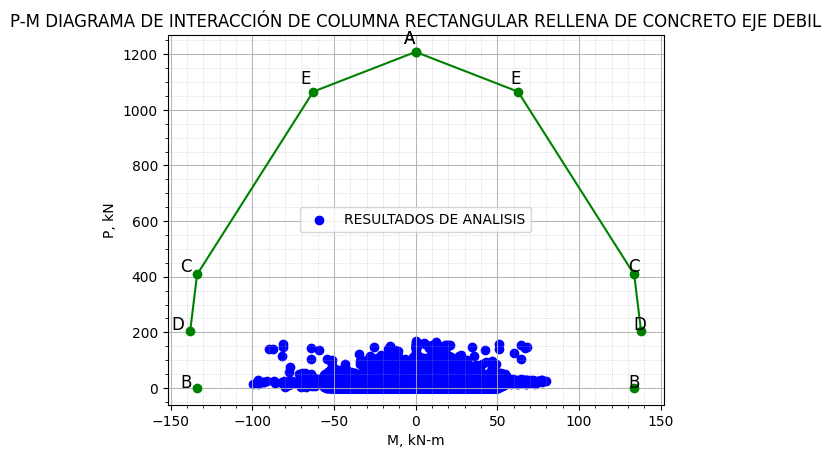

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25944 entries, 0 to 25943
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Beam     1081 non-null   float64
 1   L/C      12972 non-null  object 
 2   Node     25944 non-null  int64  
 3   Fx kN    25944 non-null  float64
 4   Fy kN    25944 non-null  float64
 5   Fz kN    25944 non-null  float64
 6   Mx kN-m  25944 non-null  float64
 7   My kN-m  25944 non-null  float64
 8   Mz kN-m  25944 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.8+ MB
el valor hi es: 134 mm
El valor bi es: 334 mm
el valor As es: 4544 mm
El valor Ac es: 44756 mm
El valor MA es: 0 kN_m
El valor PA es: 2366574.6 kN
El valor ME es: 69626544.89369881 kN_m
El valor PE es: 2086837.1999999997 kN
El valor MC es: 148668491.06 kN_m
El valor PC es: 798894.6 kN
El valor MD es: 153360853.254 kN_m
El valor PD es: 399447.29999999993 kN
El valor MB es: 148668491.06 kN_m
El valor PB es: 0 k

In [2]:
import math
########################################################################################
# CALCULOS PARA EL EJE DEBIL DE LA COLUMNA (M-y)
########################################################################################
H_d = B             # sección longitudinal de columna en mm
B_d = H             # sección transversal de columna en mm
t = 8               # Espesor de columna en mm      
Es = 200000         # Modulo de elasticidad del acero en MPa
ri = t

########################################################################################
# Propiedades geometricas de la sección
########################################################################################
hi = (H_d - 2 * t)          # sección trasversal de columna en concreto mm
bi = (B_d - 2 * t)          # sección trasversal de columna en concreto mm
As = 2 * t * (B + hi)       # Area de acero
Ac = hi * bi                # Area de concreto
Ec = 4700 * fc**0.5         # Modulo de elasticidad del concreto
round(Ac, 2)
I_cx = (bi * hi**3) / 12    # Momento de inercia de la sección de concreto
########################################################################################
# RESISTENCIA DE LA COMPRESIÓN DE LA SECCIÓN TRANSVERSAL
########################################################################################
P_no = fy*As+0.85*fc*Ac
print('P_no',P_no)
C_3 = 0.45+3*(As/(Ac+As))   
    
C_3c = min(C_3, 0.9)  
print('C_3c',C_3c)
EI_eff = C_3c*Ec*I_cx + Es*I_sx    
print('La rigidez efectiva es:', round(EI_eff, 2)) 
I_eff = EI_eff/Es
print('La inercia efectiva es:', round(I_eff, 2),'mm^4')  
P_e = 3.1416**2*EI_eff/(L**2)  
print('P_e',P_e)
if P_no/P_e < 2.25:
    print('La carga critica es:', P_no*(0.658**(P_no/P_e)))
else: 
    print('La carga critica es:', 0.877*P_e)    
J = 2.25*H**4  
print('La constante torsional de la columna es:', J, 'mm^4')   
########################################################################################
# Define la ruta de la carpeta
########################################################################################
folder_path = r'F:\2024\PROYECTOS 2024\CARLOS ARCLASS'  # Reemplaza con la ruta de tu carpeta    
file_name = 'columnas.xlsx'  # Reemplaza con el nombre de tu archivo Excel
file_path = os.path.join(folder_path, file_name)

# Verificar si el archivo existe
if not os.path.exists(file_path):
    raise FileNotFoundError(f"El archivo no se encuentra en la ruta especificada: {file_path}")

# Leer el archivo Excel
df = pd.read_excel(file_path, engine='openpyxl')

print(df)

# Verificar que las columnas 5 y 10 existan antes de convertirlas
if df.shape[1] > 3:
    df.iloc[:, 3] = pd.to_numeric(df.iloc[:, 3], errors='coerce')
if df.shape[1] > 7:
    df.iloc[:, 7] = pd.to_numeric(df.iloc[:, 8], errors='coerce')

# Punto A
MA = 0
PA = (fy * As + 0.85 * fc * Ac)
PA = round(PA, 2)

# Punto D
PD = 0.85 * fc * Ac / 2
Zc = (bi * hi**2) / 4 - 0.249 * ri**2 * hi + 0.192 * ri**3
MD = (fy * Zs_d + 0.85 * fc * Zc / 2)
print(PD)

# Punto B
hn = 0.85 * fc * Ac / (2 * (0.85 * fc * bi + 4 * fy * t))  # Menor que h/2
Zsn = 2 * t * hn**2  # mm3
Zcn = bi * hn**2
PB = 0
MB = MD - fy * Zsn - 0.85 * fc * (Zcn / 2)
MB = round(MB, 2)

# Punto C
PC = 0.85 * fc * Ac
MC = MB
PC = round(PC, 2)

# Punto E
hE = hn / 2 + H / 4
ZsE = 2 * t * hE**2
ZcE = bi * hE**2
ME = (MD - fy * ZsE - 0.85 * fc * ZcE / 2)
PE = 0.85 * fc * Ac / 2 + 0.85 * fc * bi * hE + 4 * fy * t * hE

# Crear las listas de puntos
phi_c = 0.75
phi_b = 0.90
Lambda = P_no/P_e

P_values = [phi_c*Lambda*PA / 1000, phi_c*Lambda*PE / 1000, phi_c*Lambda*PC / 1000, phi_c*Lambda*PD / 1000, phi_c*Lambda*PB / 1000]
M_values = [phi_b*MA / 1000000, phi_b*ME / 1000000, phi_b*MC / 1000000, phi_b*MD / 1000000, phi_b*MB / 1000000]
labels = ['A', 'E', 'C', 'D', 'B']
# Crear los puntos reflejados
M_values_reflejado = [-m for m in M_values]  # Reflejar los valores de M
P_values_reflejado = P_values  # Mantener los valores de P

# Combinar los puntos originales y reflejados
M_total = M_values + M_values_reflejado
P_total = P_values + P_values_reflejado
labels_total = labels + labels  # Duplicar las etiquetas para los puntos reflejados

# # Graficar las líneas entre cada par de puntos
# plt.figure(figsize=(6, 6))


plt.plot(M_values[:4], P_values[:4], 'go-')  # Conectar A, E, C, D
plt.plot(M_values[4:], P_values[4:], 'go-')  # Conectar solo B

plt.plot(M_values_reflejado[:4], P_values_reflejado[:4], 'go-')  # Conectar reflejados de A, E, C, D
plt.plot(M_values_reflejado[4:], P_values_reflejado[4:], 'go-')  # Conectar solo reflejado de B

# # Línea entre los puntos originales y reflejados
# plt.plot(M_total, P_total, 'go-')

# Añadir etiquetas a los puntos con desplazamiento
for i in range(len(P_total)):
    plt.text(M_total[i] + 0.025 * M_total[i], P_total[i] + 0.025 * P_total[i], labels_total[i], fontsize=12, ha='right')

# Añadir puntos adicionales del DataFrame
if df.shape[1] >= 9:  # Verificar que el DataFrame tenga al menos 9 columnas
    X = df.iloc[:, 7].dropna().values  # Columna 10 (índice 7)
    Y = df.iloc[:, 3].dropna().values  # Columna 4 (índice 3)
    Y = pd.Series(Y)[pd.Series(Y) > 0].dropna().values  # Filtrar solo valores positivos y eliminar valores nulos

    # Ensure X and Y have the same length
    min_length = min(len(X), len(Y))
    X = X[:min_length]
    Y = Y[:min_length]
    
    

    plt.scatter(X, Y, color='blue', label='RESULTADOS DE ANALISIS')  # Graficar los puntos adicionales
    ########################################################################
    # COMENTAR PARA QUE NO SE GRAFIQUE LAS EQUIQUETAS DE LOS PUNTOS ADICIONALES.
    # for i in range(len(X)):
    #     plt.text(X[i], Y[i], f'({X[i]}, {Y[i]})', fontsize=12, ha='right')
    ########################################################################
# Configurar etiquetas y título
plt.xlabel('M, kN-m')
plt.ylabel('P, kN')
plt.title('P-M DIAGRAMA DE INTERACCIÓN DE COLUMNA RECTANGULAR RELLENA DE CONCRETO EJE DEBIL')

# Añadir el mallado (grid) con subdivisiones
plt.grid(True, which='major', linestyle='-', linewidth=0.75, alpha=0.9)  # Líneas principales
plt.minorticks_on()  # Activar los ticks menores
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7)  # Líneas secundarias

# Mostrar leyenda y gráfica
plt.legend()
plt.show()

# Mostrar información del DataFrame
df.info()
print('el valor hi es:', hi, ('mm'))
print('El valor bi es:', bi, ('mm'))
print('el valor As es:', As, ('mm'))
print('El valor Ac es:', Ac, ('mm'))
print('El valor MA es:', MA, ('kN_m'))
print('El valor PA es:', PA, ('kN'))
print('El valor ME es:', ME, ('kN_m'))
print('El valor PE es:', PE, ('kN'))
print('El valor MC es:', MC, ('kN_m'))
print('El valor PC es:', PC, ('kN'))
print('El valor MD es:', MD, ('kN_m'))
print('El valor PD es:', PD, ('kN'))
print('El valor MB es:', MB, ('kN_m'))
print('El valor PB es:', PB, ('kN'))
print('El valor PB es:', I_cy, ('mm^4'))

########################################################################################
# Resistencia al cortante
########################################################################################
A_w = 2 * hi * t
# 1. Verificación con solo acero (AISC-360 cap G)
print('A_w:', A_w)
k_v = 5.34

def C_v1(hi, t):
    if (hi / t) < (1.1 * math.sqrt(k_v * Es / fy)):
        return 1
    else:
        return 1.1 * math.sqrt(k_v * E / fy) / (hi / t)


resultado = C_v1(hi, t)
print('C_v1:', resultado)

V_n = 0.6 * fy * A_w * resultado/1000
print('V_n:', V_n)

# Verificar que la columna 5 exista antes de convertirlas
if df.shape[1] > 5:
    df.iloc[:, 5] = pd.to_numeric(df.iloc[:, 5], errors='coerce')
# Obtener el mayor valor de la columna 5
    max_col5 = df.iloc[:, 5].max()
    print('Mayor valor de Fz:', max_col5)
# Obtener el menor valor de la columna 5
    min_col5 = df.iloc[:, 5].min()
    print('Memnor valor de Fz:', min_col5)
Ind_vpos = max_col5 / V_n  # Indice a cortante positivo
Ind_vneg = abs(min_col5 / V_n)  # Indice a cortante Negativo

# Indice de cortante
I_cort = max(Ind_vpos, Ind_vneg)
# Comparar V_n con el mayor valor de la columna 5
if I_cort > 1:
    print('No Cumple con la resistencia al cortante en el acero.', round(I_cort, 2))
else: 
    print('Cumple con la resistencia al cortante en el acero.',  round(I_cort, 2))
